In [1]:
from pylayers.util.cone import *
from pylayers.util.geomutil import *
from pylayers.util.plotutil import *

# The class Cone

The [`Cone`](http://pylayers.github.io/pylayers/modules/pylayers.util.cone.html) class implements different methods for handling planar cones. 

A planar cone is defined as : 
+ an apex 
+ two vectors $\vec{v}_a$ and  $\vec{v}_b$ not necessarily normalized. 

Let create a cone. 

In [3]:
va = np.array([2,1])
vb = np.array([1,3])
C = Cone(va,vb,apex=np.array([2,-3]))

From those parameters the Cone `__init__` constructs  2 unitary vectors $\hat{u}$ and $\hat{v}$ such that : 

+ $\hat{u} \times \hat{v} = c\hat{z} \;\; \textrm{with} \;\; c >0$ 

This can be interpreted as applying an anticlockwise rotation from $\hat{u}$ to $\hat{v}$.

In [4]:
print "Unitary vector u",C.u
print "Unitary vector v",C.v
print "dot(u,v)",C.dot
print "cross(u,v)",C.cross

Unitary vector u [ 0.89442719  0.4472136 ]
Unitary vector v [ 0.31622777  0.9486833 ]
dot(u,v) 0.707106781187
cross(u,v) 0.707106781187


## Is a point belonging to a cone ? : belong_point() 

In [5]:
p = 4*np.random.randn(2,6000)
b = C.belong_point(p)

In [6]:
nb = np.array(map(lambda x: not x,b))
pr = p[:,b]
pb = p[:,nb]

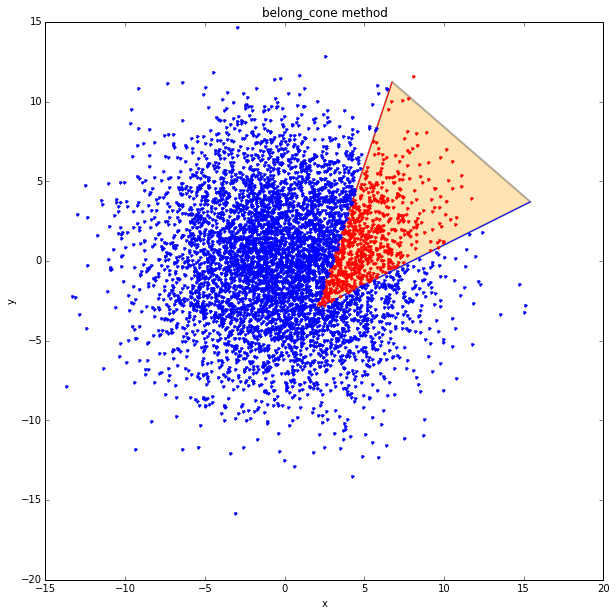

In [7]:
fig,ax = C.show()
ax.plot(pr[0,:],pr[1,:],'.r')
ax.plot(pb[0,:],pb[1,:],'.b')
plt.axis('equal')
plt.title('belong_cone method')
xlabel('x')
ylabel('y')
#plt.axis('off')

## Creating a Cone from 2 segments `from2segs()`

In [8]:
seg0 = np.array([[2,3],[0,0]])
seg1 = np.array([[0,1],[4,4]])

In [9]:
Cs=Cone()

In [10]:
Cs.from2segs(seg0,seg1)

In [11]:
Cs.apex

array([ 1.5,  2. ])

In [12]:
Cs.seg1-seg1

array([[0, 0],
       [0, 0]])

(<matplotlib.figure.Figure at 0x7fdd1381f710>,
 <matplotlib.axes.AxesSubplot at 0x7fdd1381fc10>)

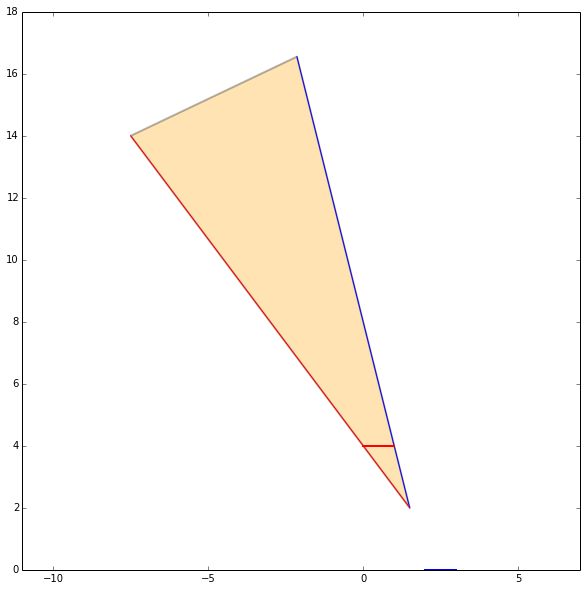

In [13]:
Cs.show()

In [14]:
b=Cs.belong_point(p)

In [15]:
pta = 10*sp.randn(2,1000)
phe = 10*sp.randn(2,1000)

In [16]:
nb = np.array(map(lambda x: not x,b))
pr = p[:,b]
pb = p[:,nb]

(-15.0, 20.0, -20.0, 20.0)

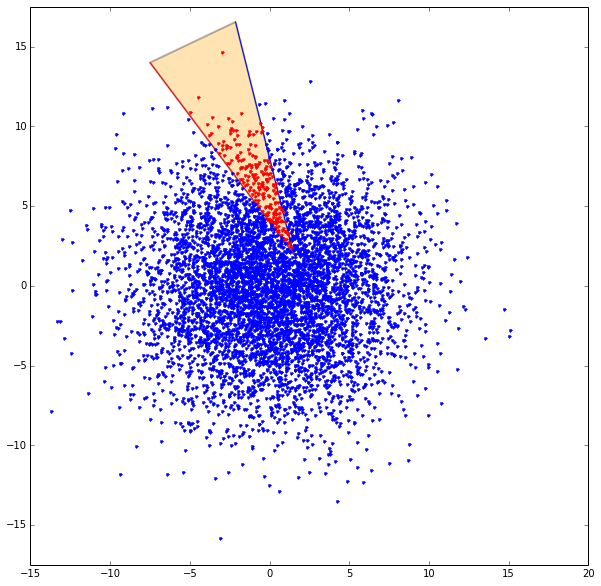

In [17]:
fig,ax = Cs.show()
#displot(pta[:,bs],phe[:,bs],color='k')
ax.plot(pr[0,:],pr[1,:],'.r')
ax.plot(pb[0,:],pb[1,:],'.b')
plt.axis('equal')
#plt.axis('off')

In [18]:
Cs.seg1

array([[0, 1],
       [4, 4]])

In [19]:
bi=Cs.belong_point2(p)

In [20]:
%timeit b=Cs.belong_point(p)

10000 loops, best of 3: 103 µs per loop


(-8.0, 10.0, -15.0, 20.0)

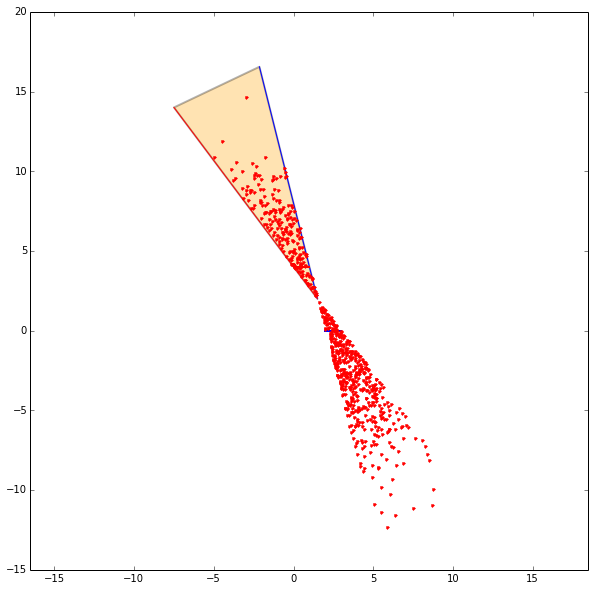

In [21]:
#nb = np.array(map(lambda x: not x,bo))
pr = p[:,bi]
#pb = p[:,bo2]
fig,ax = Cs.show()
ax.plot(pr[0,:],pr[1,:],'.r')
#ax.plot(pb[0,:],pb[1,:],'.b')
plt.axis('equal')
#plt.axis('off')

The adressed problem consists in determining whether a segment lies in the cone or not. The condition is satisfied 
if not all segments termination are outside the cone on the same side of the cone. This is implemented in the 
method `Cone.outside`

In [22]:
b1,b2=Cs.outside_point(p)

(-15.0, 20.0, -20.0, 20.0)

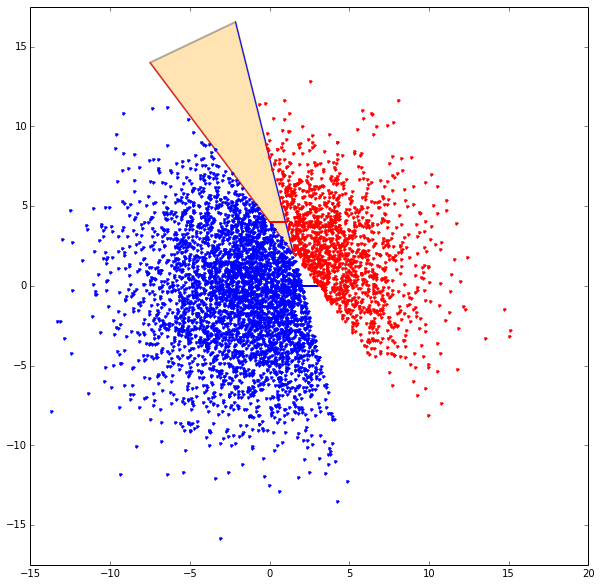

In [23]:
pr = p[:,b1]
pb = p[:,b2]
fig,ax = Cs.show()
ax.plot(pr[0,:],pr[1,:],'.r')
ax.plot(pb[0,:],pb[1,:],'.b')
plt.axis('equal')
#plt.axis('off')

Un cone est un objet qui va servir à construire les objets `Beams`. 
Un `Beam` est un `Cone` qui englobe les segments d'une `Signature`.
Une signature et un point donne un `Beam`. A un `Beam` est associé un `Cone`
dont l'apex est une ancre virtuelle. 

In [24]:
pta = 10*sp.randn(2,400)
phe = 10*sp.randn(2,400)

(<matplotlib.figure.Figure at 0x7fdd1315f690>,
 <matplotlib.axes.AxesSubplot at 0x7fdd12f99090>)

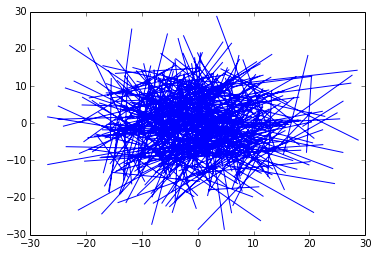

In [25]:
displot(pta,phe)

In [26]:
Cs.seg0

array([[2, 3],
       [0, 0]])

In [27]:
typ, proba = Cs.belong_seg(pta,phe)

(<matplotlib.figure.Figure at 0x7fdd12f89c50>,
 <matplotlib.axes.AxesSubplot at 0x7fdd12ffa550>)

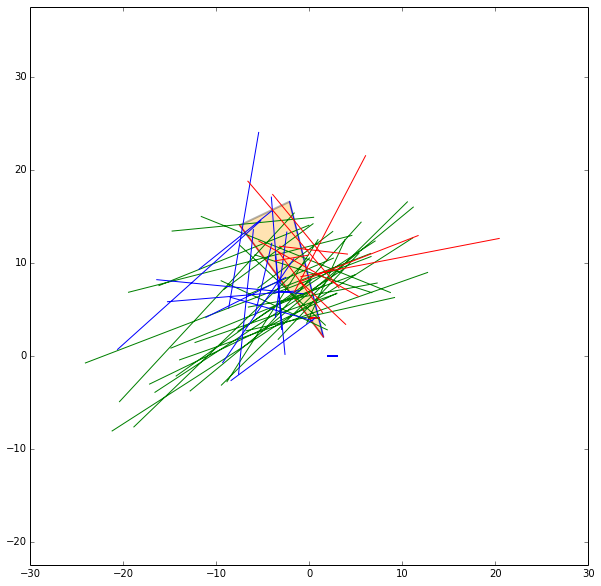

In [28]:
fig,ax = Cs.show()
bs1 = np.where(typ==1)[0]
bs2 = np.where(typ==2)[0]
bs3 = np.where(typ==3)[0]
bs4 = np.where(typ==4)[0]
bs5 = np.where(typ==5)[0]
bs6 = np.where(typ==6)[0]
displot(pta[:,bs1],phe[:,bs1],color='g')
displot(pta[:,bs2],phe[:,bs2],color='b')
displot(pta[:,bs3],phe[:,bs3],color='b')
displot(pta[:,bs4],phe[:,bs4],color='r')
displot(pta[:,bs5],phe[:,bs5],color='r')
#displot(pta[:,bs6],phe[:,bs6],color='m')
#displot(pta[:,bs],phe[:,bs],color='blue')

There is different way to create a `Cone` either from 2 segments `from2segs` or from one point and one segment `fromptseg`. This second method is used when the field is going from a diffraction point to a segment.

## Conditional Graph

$\mathcal{G}_i$ is a `conditional graph` meaning that the edge indicates which is the list of authorized next edge  for the output. 
A ray being a sequence ${\nu_k}$ of nodes of $\mathcal{G}_i$. 
The cone angular sector represents the whole set and each intercepting segment, is a part or this whole set. This can be interpreted as a probability. This means that the research of rays could be done stochastically in a very efficient manner. This is not fully implemented yet. 

In [29]:
Cb = Cone()

In [30]:
Cb.u

array([ 1.,  0.])

In [31]:
seg = np.array([[1,2],[2,2]])
pt = np.array([0,0])

In [32]:
Cb.fromptseg(pt,seg)

In [33]:
typ,proba = Cb.belong_seg(pta,phe)
bs = np.where(typ>0)[0]

In [34]:
Cb.seg1

array([[1, 2],
       [2, 2]])

(<matplotlib.figure.Figure at 0x7fdd1142a190>,
 <matplotlib.axes.AxesSubplot at 0x7fdd20a25e90>)

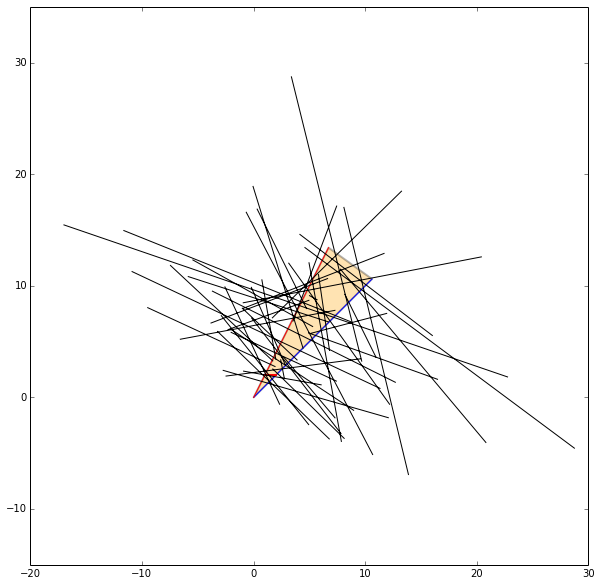

In [35]:
Cb.show()
displot(pta[:,bs],phe[:,bs],color='k')

### Benchmark normalizing a vector

In [36]:
a = np.array([5,6])

In [37]:
%timeit a/np.sqrt(np.dot(a,a))

100000 loops, best of 3: 5.02 µs per loop


In [38]:
%timeit a/sp.linalg.norm(a)

100000 loops, best of 3: 10.7 µs per loop


In [39]:
%timeit a/np.sqrt(np.sum(a*a,axis=0))

100000 loops, best of 3: 9.17 µs per loop


## Debug

This a case which where segments `seg0` and `seg1` are orthogonal

In [40]:
seg0 = array([[-25.768, -25.822],                                                                                  
       [  4.28 ,   9.925]])    

In [41]:
seg1 = array([[-26.848, -26.805],         
       [  5.415,   4.515]])   

In [42]:
cn = Cone()

In [43]:
cn.from2segs(seg0,seg1)

In [44]:
pta =array([[-27.836, -27.833, -27.833, -27.817, -26.848, -27.774, -26.952,       
        -28.062],                                                     
       [ 10.926,  10.686,  10.686,   8.956,   5.415,   4.506,  10.934,    8.954]])                 

In [45]:
phe = array([[-27.835, -27.835, -28.078, -27.774, -26.882, -26.805, -27.836,                                                                                                                 
        -28.078],                                                                                                                                                                   
       [ 10.891,  10.891,  10.683,   4.506,   8.965,   4.515,  10.926,                                                               
         10.683]])  

In [46]:
typ,proba = cn.belong_seg(pta,phe)
bn = np.where(typ==0)[0]

In [47]:
proba

array([ 0.        ,  0.        ,  0.        ,  0.36658801,  0.        ,
        0.36658801,  0.        ,  0.        ])

(<matplotlib.figure.Figure at 0x7fdd114b7810>,
 <matplotlib.axes.AxesSubplot at 0x7fdd12f6da90>)

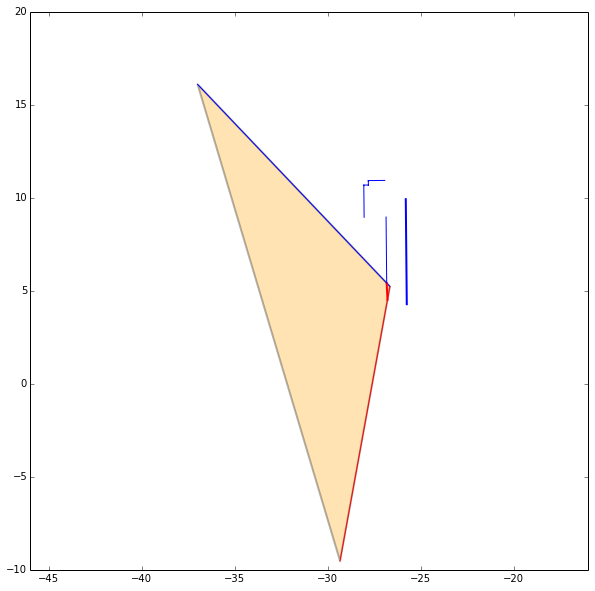

In [48]:
cn.show()
displot(pta[:,bn],phe[:,bn])

In [49]:
cn.apex

array([-26.67458396,   5.23275258])

In [50]:
cn.seg1

array([[-26.805, -26.848],
       [  4.515,   5.415]])

In [51]:
pta.T

array([[-27.836,  10.926],
       [-27.833,  10.686],
       [-27.833,  10.686],
       [-27.817,   8.956],
       [-26.848,   5.415],
       [-27.774,   4.506],
       [-26.952,  10.934],
       [-28.062,   8.954]])

In [52]:
phe.T

array([[-27.835,  10.891],
       [-27.835,  10.891],
       [-28.078,  10.683],
       [-27.774,   4.506],
       [-26.882,   8.965],
       [-26.805,   4.515],
       [-27.836,  10.926],
       [-28.078,  10.683]])

In [53]:
pta1=pta[:,5].reshape(2,1)
phe1=phe[:,5].reshape(2,1)

(<matplotlib.figure.Figure at 0x7fdd13004250>,
 <matplotlib.axes.AxesSubplot at 0x7fdd112bca50>)

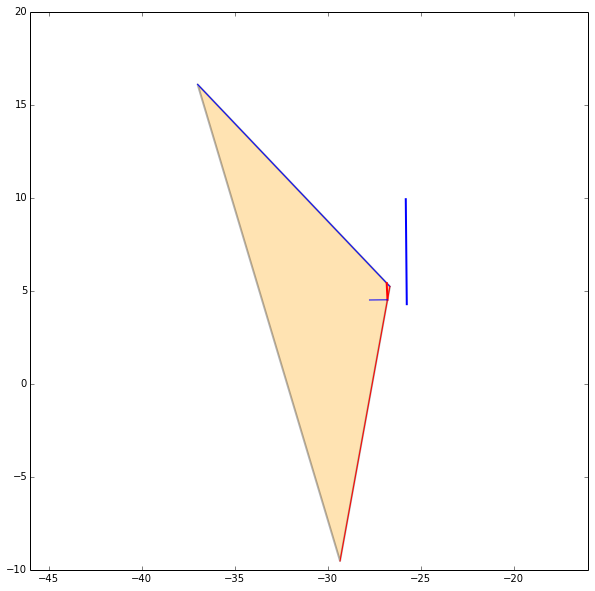

In [54]:
cn.show()
displot(pta1,phe1)

In [55]:
pta1

array([[-27.774],
       [  4.506]])

In [56]:
phe1

array([[-26.805],
       [  4.515]])

In [57]:
b = cn.belong_seg(pta1,phe1)

## geomutil.mirror

In [58]:
p = np.random.randn(2,10000)
pa  = np.array([-1,1]).reshape(2,1)
pb  = np.array([-1,3]).reshape(2,1)
M = geu.mirror(p,pa,pb)

In [59]:
M

array([[-3.14982613, -1.70314403, -2.15545924, ..., -3.66050496,
        -3.04438101, -2.44244337],
       [ 0.1325281 , -0.58860675, -0.08353195, ..., -0.32841096,
         0.56330277, -0.45096549]])

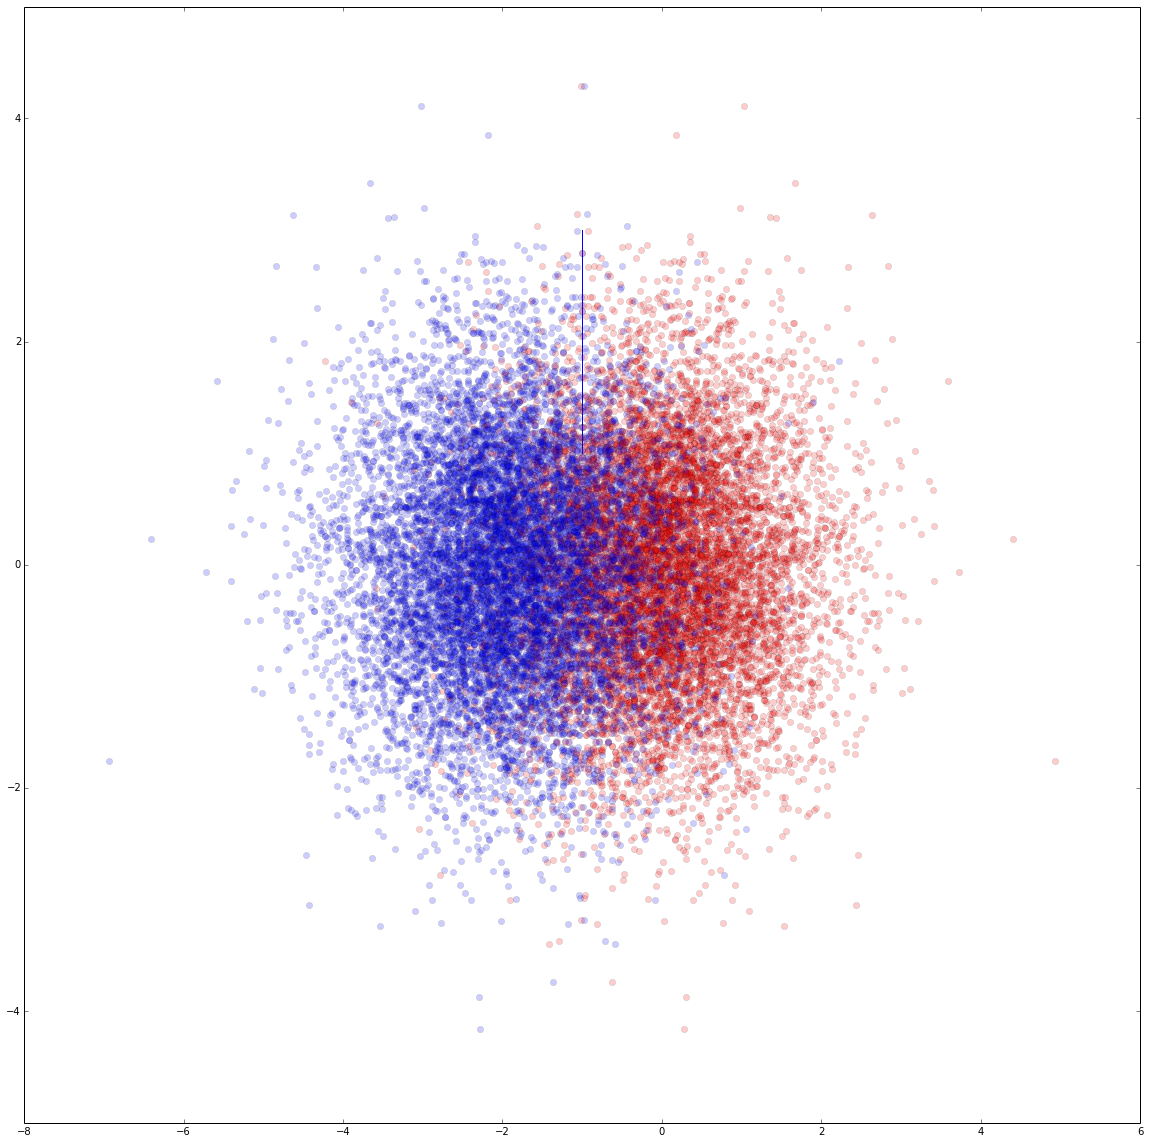

In [60]:
figsize(20,20)
displot(pa,pb)
plot(p[0,:],p[1,:],'or',alpha=0.2)
plot(M[0,:],M[1,:],'ob',alpha=0.2)


In [61]:
pa=np.array([0,0]).reshape(2,1)
pb=np.array([1,0]).reshape(2,1)
pc=np.array([1,0]).reshape(2,1)

In [62]:
geu.isaligned(pa,pb,pc)

array([ True], dtype=bool)

## Geometric probability

The idea is to add an information of the fraction of the angular sector which is subtended by the intercepted segment. 

In [63]:
a = np.array([2,1])
b = np.array([1,3])
C = Cone(a,b,apex=np.array([2,-3]))

In [64]:
import scipy as sp
pta = np.array([2,-1]).reshape(2,1)
phe = np.array([5.99,-1]).reshape(2,1)
pta = 10*sp.randn(2,1000)
phe = 10*sp.randn(2,1000)
typ,proba = C.belong_seg(pta,phe)
u0 = np.where(typ==0)[0]
u1 = np.where(typ==1)[0]
u2 = np.where(typ==2)[0]
u3 = np.where(typ==3)[0]
u4 = np.where(typ==4)[0]
u5 = np.where(typ==5)[0]
u6 = np.where(typ==6)[0]
us = np.where( ((proba<0.1) & (proba>0)) )  [0]

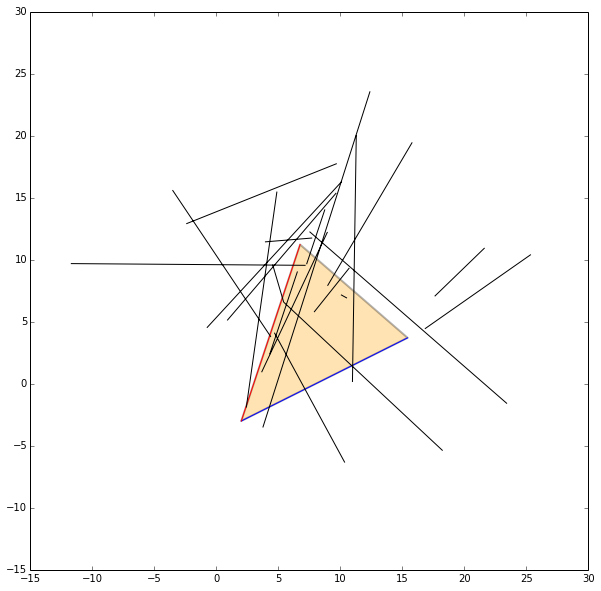

In [65]:
C.show()
#col=['r','g','b','m']
try:
    displot(pta[:,us],phe[:,us],color='k')
except:
    pass

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


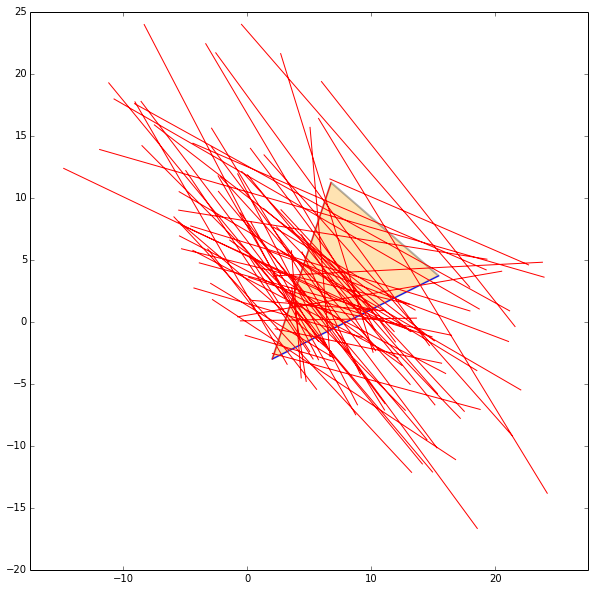

In [66]:
C.show()
#col=['r','g','b','m']
try:
    displot(pta[:,u1],phe[:,u1],color='r')
except:
    pass
print proba[u1]

[ 0.01595383  0.20853493  0.16270922  0.67682437  0.25094575  0.65430395
  0.38054079  0.05819736  0.65070121  0.44711885  0.14449714  0.93895135
  0.76452284  0.81505421  0.5228525   0.21044162  0.19170093  0.08583838
  0.7930226   0.59950852  0.6044619   0.76683796  0.50334732  0.14642156
  0.53695567  0.64944684  0.48164823  0.32379581  0.04102593  0.41327271
  0.66328808  0.44656266  0.52096101  0.99336419  0.45249353]


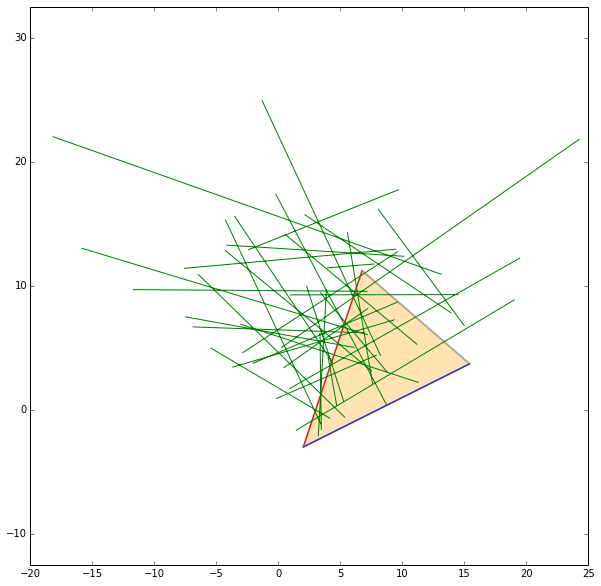

In [67]:
C.show()

try:
    displot(pta[:,u2],phe[:,u2],color='g')
except:
    pass
print(proba[u2])

[ 0.50811604  0.54216416  0.09200085  0.09538675  0.56183513  0.24506377
  0.49390972  0.47864877  0.46098     0.55426894  0.71363893  0.61054289
  0.61538553  0.36069338  0.30402059  0.16022635  0.39796474  0.7026786
  0.68156896  0.30630409  0.32182377  0.75955318  0.98633744  0.63593433
  0.1942956   0.95099856  0.02630538  0.84815702  0.55291478  0.55484274
  0.81245148  0.43951992  0.66188062  0.90786209  0.16843639  0.33305348
  0.86592537  0.54656774  0.03408855]


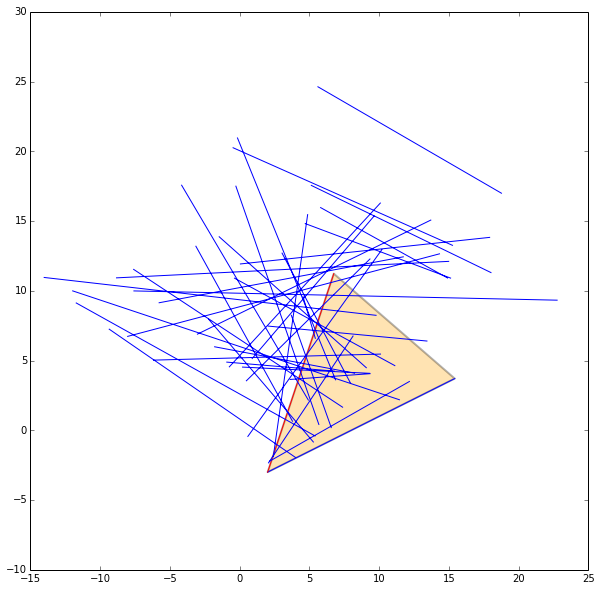

In [68]:
C.show()
try:
    displot(pta[:,u3],phe[:,u3],color='b')
except:
    pass
print(proba[u3])

[ 0.36947478  0.83270738  0.65399017  0.24624756  0.76102651  0.50346752
  0.03398412  0.74576811]


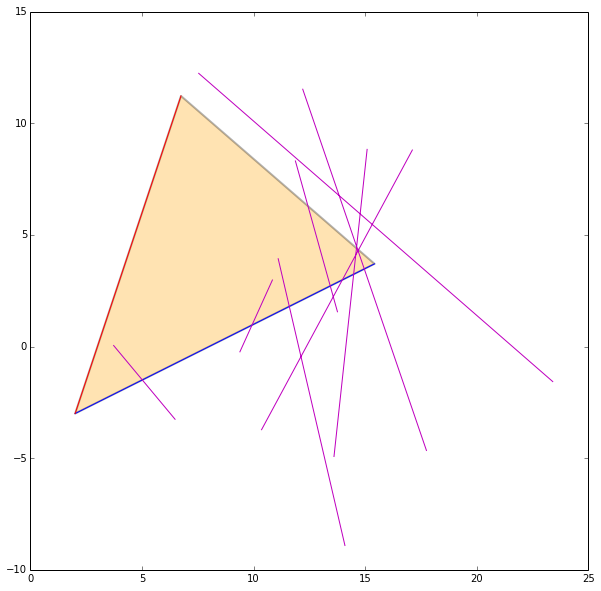

In [69]:
C.show()
try:
    displot(pta[:,u4],phe[:,u4],color='m')
except:
    pass
print(proba[u4])

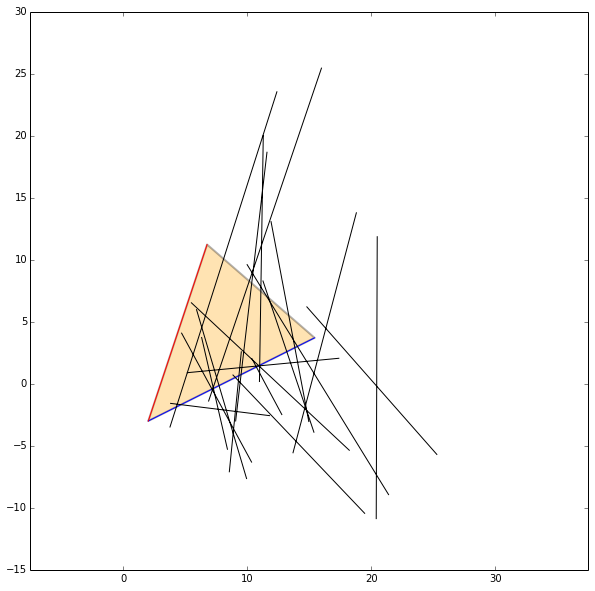

In [70]:
C.show()
try:
    displot(pta[:,u5],phe[:,u5],color='k')
except:
    pass

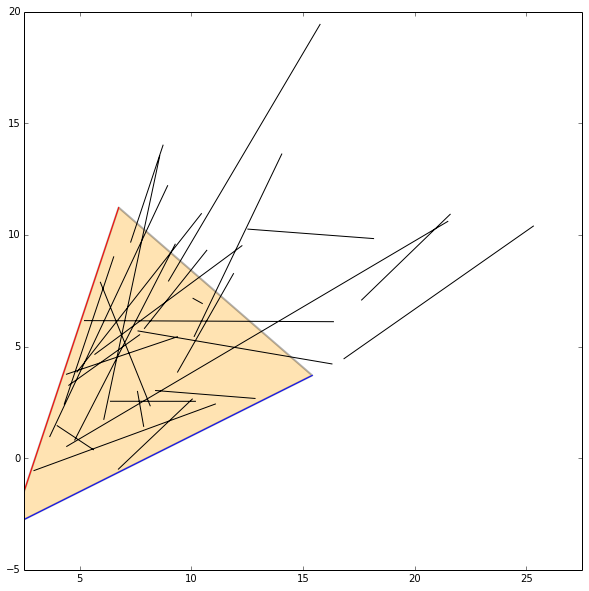

In [71]:
C.show()
try:
    displot(pta[:,u6],phe[:,u6],color='k')
except:
    pass